<a href="https://colab.research.google.com/github/chorimgenius/dp_project/blob/0719/Kor_QnA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bert Model 다운로드

In [1]:
!wget https://storage.googleapis.com/bert_models/2018_11_23/multi_cased_L-12_H-768_A-12.zip

--2023-07-19 07:59:59--  https://storage.googleapis.com/bert_models/2018_11_23/multi_cased_L-12_H-768_A-12.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 173.194.202.128, 173.194.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 662903077 (632M) [application/zip]
Saving to: ‘multi_cased_L-12_H-768_A-12.zip’

multi_cased_L-12_H- 100%[===================>] 632.19M   120MB/s    in 4.7s    

2023-07-19 08:00:04 (135 MB/s) - ‘multi_cased_L-12_H-768_A-12.zip’ saved [662903077/662903077]



In [2]:
import os

# 'bert'라는 이름의 디렉토리 만들기
if "bert" not in os.listdir():
    os.makedirs("bert")
else:
    pass

import zipfile
import shutil

# 만들어 둔 'bert' 디렉토리에 zip파일 압축해제
bert_zip = zipfile.ZipFile('multi_cased_L-12_H-768_A-12.zip')
bert_zip.extractall('bert')

# zip파일 닫기
bert_zip.close()

# 데이터셋 다운로드

### KorQuAD1.0 한국어 Q&A

In [3]:
 !wget https://github.com/monologg/KoBERT-KorQuAD/blob/60898d3c0ed8fc724109cbe18855f9a48824216f/data/KorQuAD_v1.0_dev.json
 !wget https://github.com/monologg/KoBERT-KorQuAD/blob/60898d3c0ed8fc724109cbe18855f9a48824216f/data/KorQuAD_v1.0_train.json

--2023-07-19 08:00:14--  https://github.com/monologg/KoBERT-KorQuAD/blob/60898d3c0ed8fc724109cbe18855f9a48824216f/data/KorQuAD_v1.0_dev.json
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4778 (4.7K) [text/plain]
Saving to: ‘KorQuAD_v1.0_dev.json’

KorQuAD_v1.0_dev.js 100%[===================>]   4.67K  --.-KB/s    in 0s      

2023-07-19 08:00:14 (67.9 MB/s) - ‘KorQuAD_v1.0_dev.json’ saved [4778/4778]

--2023-07-19 08:00:14--  https://github.com/monologg/KoBERT-KorQuAD/blob/60898d3c0ed8fc724109cbe18855f9a48824216f/data/KorQuAD_v1.0_train.json
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4791 (4.7K) [text/plain]
Saving to: ‘KorQuAD_v1.0_train.json’

KorQuAD_v1.0_train. 100%[===================>]   4.68K  --.-KB/s    in 0s   

In [4]:
# 현재 위치 폴더 내의 파일 list보기
os.listdir()

['.config',
 'KorQuAD_v1.0_dev.json',
 'bert',
 'multi_cased_L-12_H-768_A-12.zip',
 'KorQuAD_v1.0_train.json',
 'sample_data']

In [5]:
# Google Drive와 Colab 연동
import os
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
path = "gdrive/My Drive/dp_project"

# 예측 모델을 만들기 위한 필요 라이브러리 호출

In [7]:
# Colab의 기본 Tensorflow의 버전은 2.x이기 때문에 버전 지정
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import pandas as pd # 데이터프레임 형식을 사용하기 위한 라이브러리
import numpy as np
import re
import pickle # 학습한 모델을 저장하거나, 열 떄 사용

import keras as keras
from keras.models import load_model # 모델 불러오기
from keras import backend as K
from keras import Input, Model
from keras import optimizers

from keras import backend as K
from keras.layers import Layer

import codecs
from tqdm import tqdm # 학습하는 동안 얼마나 학습했는지 눈으로 수치화해서 bar로 보여주는 라이브러리
import shutil
import json # 데이터 형식이 json 형식이므로 json 처리에 필요한 라이브러리

Instructions for updating:
non-resource variables are not supported in the long term


In [8]:
import warnings
warnings.filterwarnings(action='ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.logging.set_verbosity(tf.logging.ERROR)

## Bert 활용을 쉽게하기 위한 keras-bert 설치
## Adam optimizer 수정판 keras-radam 모듈 Import

In [9]:
!pip install keras-bert
!pip install keras-radam

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for keras-bert: filename=keras_bert-0.89.0-py3-none-any.whl size=33501 sha256=c2907bd46c0ca61ad413e8edf526ae33cf5112d7b3212b5d099cb78289d5e96a
  Stored in directory: /root/.cache/pip/wheels/89/0c/04/646b6fdf6375911b42c8d540a8a3fda8d5d77634e5dcbe7b26
  Created wheel for keras-transformer: filename=keras_transformer-0.40.0-py3-none-any.whl size=12287 sha256=61d764c37837bd942d3edc592be7cd341eaa88627dfd68eb27307ba1f1a52314
  Stored in directory: /root/.cache/pip/wheels/f2/cb/22/75a0ad376129177f7c95c0d91331a18f5368fd657f4035ba7c
  Created wheel for keras-embed-sim: filename=keras_embed_sim-0.10.0-py3-none-any.whl size=3943 sha256=256871756adacfe50096bf9

# keras-bert 라이브러리에서 Bert Model 활용에 필요한 모듈 Import

In [10]:
from keras_bert import load_trained_model_from_checkpoint, load_vocabulary
from keras_bert import Tokenizer
from keras_bert import AdamWarmup, calc_train_steps

from keras_radam import RAdam

KoQuAD JSON 파일을 PANDAS DATAFRAME으로 변환

In [11]:
def korquad_json_to_dataframe_train(input_file_path, record_path = ['data','paragraphs','qas','answers'],
                           verbose = 1):
    if verbose:
        print("Reading the json file")
    file = json.loads(open(input_file_path).read())
    if verbose:
        print("processing...")
    # parsing different level's in the json file
    js = pd.io.json.json_normalize(file , record_path )
    m = pd.io.json.json_normalize(file, record_path[:-1] )
    r = pd.io.json.json_normalize(file,record_path[:-2])

    #combining it into single dataframe
    idx = np.repeat(r['context'].values, r.qas.str.len())
    ndx  = np.repeat(m['id'].values,m['answers'].str.len())
    m['context'] = idx
    js['q_idx'] = ndx
    main = pd.concat([ m[['id','question','context']].set_index('id'),js.set_index('q_idx')],1,sort=False).reset_index()
    main['c_id'] = main['context'].factorize()[0]
    if verbose:
        print("shape of the dataframe is {}".format(main.shape))
        print("Done")
    return main

In [12]:
train = korquad_json_to_dataframe_train(path+"/dataset/KorQuAD_v1.0_train.json")

Reading the json file
processing...
shape of the dataframe is (60407, 6)
Done


In [13]:
train

,index,question,context,text,answer_start,c_id
0,6566495-0-0,바그너는 괴테의 파우스트를 읽고 무엇을 쓰고자 했는가?,1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로...,교향곡,54,0
1,6566495-0-1,바그너는 교향곡 작곡을 어디까지 쓴 뒤에 중단했는가?,1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로...,1악장,421,0
2,6566495-0-2,바그너가 파우스트 서곡을 쓸 때 어떤 곡의 영향을 받았는가?,1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로...,베토벤의 교향곡 9번,194,0
3,6566518-0-0,1839년 바그너가 교향곡의 소재로 쓰려고 했던 책은?,1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로...,파우스트,15,0
4,6566518-0-1,파우스트 서곡의 라단조 조성이 영향을 받은 베토벤의 곡은?,1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로...,합창교향곡,354,0
...,...,...,...,...,...,...
60402,6467478-1-1,뉴델리 메탈로 베타락마제가 처음 감염 된 지역은 어디인가?,"유전자의 이름은 인도의 수도 뉴델리의 이름을 따 붙여졌는데, 이는 2009년 용 (...",인도,73,9604
60403,6467478-2-0,균은 유전자를 균에게 전달 할 수있는데 이러한 현상을 나타낸 용어는 무엇인가?,"2010년 8월, 저널 The Lancet Infectious Diseases에 최...",유전자 전달,253,9605
60404,6467478-2-1,박테리아가 NDM-1 유전자를 가지고 있을때 발생하는 전파를 분석하기위해 사용된 영...,"2010년 8월, 저널 The Lancet Infectious Diseases에 최...",37건,129,9605
60405,6490801-2-0,NDM-1 유전자를 가진 박테리아가 감수성을 보인 폴리믹슨 계열 항생제는?,"2010년 8월, 저널 The Lancet Infectious Diseases에 최...",콜리스틴,404,9605


bert 훈련을 위한 사전 설정

In [14]:
# SEQ_LEN  - 문장의 최대 길이 기준
# SEQ_LEN보다 문장이 작을 경우 남은 부분은 0으로 채워짐
# SEQ_LEN보다 문장이 길경우 SEQ_LEN을 초과하는 부분이 잘려짐
SEQ_LEN = 384
BATCH_SIZE = 10
EPOCHS =1
LR = 3E-5

pretrained_path = "bert/multi_cased_L-12_H-768_A-12"
config_path = os.path.join(pretrained_path, 'bert_config.json')
checkpoint_path = os.path.join(pretrained_path, 'bert_model.ckpt')
vocab_path = os.path.join(pretrained_path, 'vocab.txt')

DATA_COLUMN = 'context'
QUESTION_COLUMN = 'question'
TEXT = 'text'

vocab.txt에 있는 단어에 index를 추가해주는 token_dick라는 딕셔너리 생성

분석할 문장이 토큰화 → 인덱스로 변경 → Bert 신경망에 input으로 들어감

In [15]:
token_dict = {}
with codecs.open(vocab_path, 'r', 'utf8') as reader:
    for line in reader:
        token = line.strip()
        if "_" in token:
            token = token.replace("_", "")
            token = '##' + token
        token_dict[token] = len(token_dict)

Tokenizer 재정의

 - BERT 토큰화는 단어를 분리하는 토큰화 방식(wordpiece 방식)
 - 한국어를 형태소로 꼭 변환해야할 문제를 해결.
 - 의미가 있는 단어는 밀접하게 연관이 되게하는 장점
 - 단어의 첫 시작은 ##가 붙지 않지만, 단어에 포함되면서 단어의 시작이 아닌 부분에는 ##가 붙는 것이 특징
 - 기존 Tokenizer class를 상속 받아서 재정의 해주어야 완전자모분리 현상이 발생하지 않음

In [16]:
class inherit_Tokenizer(Tokenizer):
    def _tokenize(self, text):
        if not self._cased:
            text = text
            text = text.lower()
        spaced = ''

        for ch in text:
            if self._is_punctuation(ch) or self._is_cjk_character(ch):
                spaced += ' '+ ch +' '
            elif self._is_space(ch):
                spaced += ' '
            elif ord(ch) == 0 or ord(ch) == 0xfffd or self._is_control(ch):
                continue
            else:
                spaced += ch
        tokens = []
        for word in spaced.strip().split():
            tokens += self._word_piece_tokenize(word)
        return tokens

In [17]:
tokenizer = inherit_Tokenizer(token_dict)

Token화 확인
 - 문장 앞에 [CLS] 문자 위치
 - 문장 뒤에 [SEP] 문자 위치

In [18]:
print(tokenizer.tokenize('한국어 토큰화.'), tokenizer.tokenize('잘되니?'))

['[CLS]', '한국', '##어', '토', '##큰', '##화', '.', '[SEP]'] ['[CLS]', '잘', '##되', '##니', '?', '[SEP]']


In [19]:
token_dict

{'[PAD]': 0,
 '[unused1]': 1,
 '[unused2]': 2,
 '[unused3]': 3,
 '[unused4]': 4,
 '[unused5]': 5,
 '[unused6]': 6,
 '[unused7]': 7,
 '[unused8]': 8,
 '[unused9]': 9,
 '[unused10]': 10,
 '[unused11]': 11,
 '[unused12]': 12,
 '[unused13]': 13,
 '[unused14]': 14,
 '[unused15]': 15,
 '[unused16]': 16,
 '[unused17]': 17,
 '[unused18]': 18,
 '[unused19]': 19,
 '[unused20]': 20,
 '[unused21]': 21,
 '[unused22]': 22,
 '[unused23]': 23,
 '[unused24]': 24,
 '[unused25]': 25,
 '[unused26]': 26,
 '[unused27]': 27,
 '[unused28]': 28,
 '[unused29]': 29,
 '[unused30]': 30,
 '[unused31]': 31,
 '[unused32]': 32,
 '[unused33]': 33,
 '[unused34]': 34,
 '[unused35]': 35,
 '[unused36]': 36,
 '[unused37]': 37,
 '[unused38]': 38,
 '[unused39]': 39,
 '[unused40]': 40,
 '[unused41]': 41,
 '[unused42]': 42,
 '[unused43]': 43,
 '[unused44]': 44,
 '[unused45]': 45,
 '[unused46]': 46,
 '[unused47]': 47,
 '[unused48]': 48,
 '[unused49]': 49,
 '[unused50]': 50,
 '[unused51]': 51,
 '[unused52]': 52,
 '[unused53]': 53

In [20]:
reserve_token_dict = {v: k for k, v in token_dict.items()}

In [21]:
reserve_token_dict

{0: '[PAD]',
 1: '[unused1]',
 2: '[unused2]',
 3: '[unused3]',
 4: '[unused4]',
 5: '[unused5]',
 6: '[unused6]',
 7: '[unused7]',
 8: '[unused8]',
 9: '[unused9]',
 10: '[unused10]',
 11: '[unused11]',
 12: '[unused12]',
 13: '[unused13]',
 14: '[unused14]',
 15: '[unused15]',
 16: '[unused16]',
 17: '[unused17]',
 18: '[unused18]',
 19: '[unused19]',
 20: '[unused20]',
 21: '[unused21]',
 22: '[unused22]',
 23: '[unused23]',
 24: '[unused24]',
 25: '[unused25]',
 26: '[unused26]',
 27: '[unused27]',
 28: '[unused28]',
 29: '[unused29]',
 30: '[unused30]',
 31: '[unused31]',
 32: '[unused32]',
 33: '[unused33]',
 34: '[unused34]',
 35: '[unused35]',
 36: '[unused36]',
 37: '[unused37]',
 38: '[unused38]',
 39: '[unused39]',
 40: '[unused40]',
 41: '[unused41]',
 42: '[unused42]',
 43: '[unused43]',
 44: '[unused44]',
 45: '[unused45]',
 46: '[unused46]',
 47: '[unused47]',
 48: '[unused48]',
 49: '[unused49]',
 50: '[unused50]',
 51: '[unused51]',
 52: '[unused52]',
 53: '[unused53]'

- Bert에 Input으로 들어가는 Token은 문장을 Tokenizing한 후, 인덱스 번호를 매긴 것
- segment는 문장 2개 이상 있을 경우, 앞의 문장과 뒤의 문장을 구분하는 것
- Position Embedding은 단순히 단어의 위치를 말함

In [22]:
question = train['question'][0]
context = train['context'][0]
text = train['text'][0]

In [23]:
question

'바그너는 괴테의 파우스트를 읽고 무엇을 쓰고자 했는가?'

In [24]:
context

'1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로 해서 하나의 교향곡을 쓰려는 뜻을 갖는다. 이 시기 바그너는 1838년에 빛 독촉으로 산전수전을 다 걲은 상황이라 좌절과 실망에 가득했으며 메피스토펠레스를 만나는 파우스트의 심경에 공감했다고 한다. 또한 파리에서 아브네크의 지휘로 파리 음악원 관현악단이 연주하는 베토벤의 교향곡 9번을 듣고 깊은 감명을 받았는데, 이것이 이듬해 1월에 파우스트의 서곡으로 쓰여진 이 작품에 조금이라도 영향을 끼쳤으리라는 것은 의심할 여지가 없다. 여기의 라단조 조성의 경우에도 그의 전기에 적혀 있는 것처럼 단순한 정신적 피로나 실의가 반영된 것이 아니라 베토벤의 합창교향곡 조성의 영향을 받은 것을 볼 수 있다. 그렇게 교향곡 작곡을 1839년부터 40년에 걸쳐 파리에서 착수했으나 1악장을 쓴 뒤에 중단했다. 또한 작품의 완성과 동시에 그는 이 서곡(1악장)을 파리 음악원의 연주회에서 연주할 파트보까지 준비하였으나, 실제로는 이루어지지는 않았다. 결국 초연은 4년 반이 지난 후에 드레스덴에서 연주되었고 재연도 이루어졌지만, 이후에 그대로 방치되고 말았다. 그 사이에 그는 리엔치와 방황하는 네덜란드인을 완성하고 탄호이저에도 착수하는 등 분주한 시간을 보냈는데, 그런 바쁜 생활이 이 곡을 잊게 한 것이 아닌가 하는 의견도 있다.'

In [25]:
text

'교향곡'

In [26]:
print(tokenizer.tokenize(question, context))

['[CLS]', '바', '##그', '##너', '##는', '괴', '##테', '##의', '파', '##우스', '##트를', '읽', '##고', '무', '##엇', '##을', '쓰', '##고', '##자', '했', '##는', '##가', '?', '[SEP]', '1839', '##년', '바', '##그', '##너', '##는', '괴', '##테', '##의', '파', '##우스', '##트', '##을', '처음', '읽', '##고', '그', '내', '##용', '##에', '마', '##음', '##이', '끌', '##려', '이를', '소', '##재', '##로', '해', '##서', '하나의', '교', '##향', '##곡', '##을', '쓰', '##려', '##는', '뜻', '##을', '갖', '##는다', '.', '이', '시', '##기', '바', '##그', '##너', '##는', '1838', '##년에', '빛', '독', '##촉', '##으로', '산', '##전', '##수', '##전을', '다', '걲', '##은', '상', '##황', '##이', '##라', '좌', '##절', '##과', '실', '##망', '##에', '가', '##득', '##했으며', '메', '##피', '##스', '##토', '##펠', '##레스', '##를', '만', '##나는', '파', '##우스', '##트', '##의', '심', '##경', '##에', '공', '##감', '##했다', '##고', '한다', '.', '또한', '파', '##리에', '##서', '아', '##브', '##네', '##크', '##의', '지', '##휘', '##로', '파', '##리', '음악', '##원', '관', '##현', '##악', '##단', '##이', '연', '##주', '##하는', '베', '##토', '##벤', '##의', '교', '##향', '##곡', '9'

In [27]:
print(tokenizer.tokenize(text))

['[CLS]', '교', '##향', '##곡', '[SEP]']


In [28]:
def convert_data(data_df):
    global tokenizer
    indices, segments, target_start, target_end = [], [], [], []
    for i in tqdm(range(len(data_df))):

        ids, segment = tokenizer.encode(data_df[QUESTION_COLUMN][i], data_df[DATA_COLUMN][i], max_len=SEQ_LEN)


        text = tokenizer.encode(data_df[TEXT][i])[0]

        text_slide_len = len(text[1:-1])
        for i in range(1,len(ids)-text_slide_len-1):
            exist_flag = 0
            if text[1:-1] == ids[i:i+text_slide_len]:
              ans_start = i
              ans_end = i + text_slide_len - 1
              exist_flag = 1
              break

        if exist_flag == 0:
            ans_start = SEQ_LEN
            ans_end = SEQ_LEN

        indices.append(ids)
        segments.append(segment)

        target_start.append(ans_start)
        target_end.append(ans_end)

    indices_x = np.array(indices)
    segments = np.array(segments)
    target_start = np.array(target_start)
    target_end = np.array(target_end)

    del_list = np.where(target_start!=SEQ_LEN)[0]

    indices_x = indices_x[del_list]
    segments = segments[del_list]
    target_start = target_start[del_list]
    target_end = target_end[del_list]

    train_y_0 = keras.utils.to_categorical(target_start, num_classes=SEQ_LEN, dtype='int64')
    train_y_1 = keras.utils.to_categorical(target_end, num_classes=SEQ_LEN, dtype='int64')
    train_y_cat = [train_y_0, train_y_1]

    return [indices_x, segments], train_y_cat

def load_data(pandas_dataframe):
    data_df = pandas_dataframe

    data_df[DATA_COLUMN] = data_df[DATA_COLUMN].astype(str)
    data_df[QUESTION_COLUMN] = data_df[QUESTION_COLUMN].astype(str)

    data_x, data_y = convert_data(data_df)

    return data_x, data_y

In [29]:
train_x, train_y = load_data(train)

100%|██████████| 60407/60407 [01:46<00:00, 568.85it/s]


In [30]:
train_x[0]

array([[   101,   9318,  78136, ...,  12178,   9011,    102],
       [   101,   9318,  78136, ...,   9011, 118783,    102],
       [   101,   9318,  78136, ...,   9011, 118783,    102],
       ...,
       [   101,   9319, 119351, ...,      0,      0,      0],
       [   101,    182,  10162, ...,      0,      0,      0],
       [   101,  19145,  17289, ...,      0,      0,      0]])

In [31]:
train.shape

(60407, 6)

In [32]:
train_x[0].shape

(50609, 384)

In [33]:
layer_num = 12
model = load_trained_model_from_checkpoint(
    config_path,
    checkpoint_path,
    training=False,
    trainable=True,
    seq_len = SEQ_LEN
)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input-Token (InputLayer)       [(None, 384)]        0           []                               
                                                                                                  
 Input-Segment (InputLayer)     [(None, 384)]        0           []                               
                                                                                                  
 Embedding-Token (TokenEmbeddin  [(None, 384, 768),  91812096    ['Input-Token[0][0]']            
 g)                              (119547, 768)]                                                   
                                                                                                  
 Embedding-Segment (Embedding)  (None, 384, 768)     1536        ['Input-Segment[0][0]']    

In [34]:
class NonMasking(Layer):
    def __init__(self, **kwargs):
        self.supports_masking = True
        super(NonMasking, self).__init__(**kwargs)

    def build(self, input_shape):
        input_shape = input_shape

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        return x

    def get_out_shape_for(self, input_shape):
        return input_shape

In [35]:
class MyLayer_Start(Layer):

    def __init__(self,seq_len, **kwargs):

        self.seq_len = seq_len
        self.supports_masking = True
        super(MyLayer_Start, self).__init__(**kwargs)

    def build(self, input_shape):

        self.W = self.add_weight(name='kernel',
                                 shape=(input_shape[2],2),
                                 initializer='uniform',
                                 trainable=True)
        super(MyLayer_Start, self).build(input_shape)

    def call(self, x):

        x = K.reshape(x, shape=(-1,self.seq_len,K.shape(x)[2]))
        x = K.dot(x, self.W)

        x = K.permute_dimensions(x, (2,0,1))

        self.start_logits, self.end_logits = x[0], x[1]

        self.start_logits = K.softmax(self.start_logits, axis=-1)

        return self.start_logits

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.seq_len)

In [36]:
class MyLayer_End(Layer):
  def __init__(self,seq_len, **kwargs):

        self.seq_len = seq_len
        self.supports_masking = True
        super(MyLayer_End, self).__init__(**kwargs)

  def build(self, input_shape):

        self.W = self.add_weight(name='kernel',
                                 shape=(input_shape[2], 2),
                                 initializer='uniform',
                                 trainable=True)
        super(MyLayer_End, self).build(input_shape)


  def call(self, x):


        x = K.reshape(x, shape=(-1,self.seq_len,K.shape(x)[2]))
        x = K.dot(x, self.W)
        x = K.permute_dimensions(x, (2,0,1))

        self.start_logits, self.end_logits = x[0], x[1]

        self.end_logits = K.softmax(self.end_logits, axis=-1)

        return self.end_logits

  def compute_output_shape(self, input_shape):
        return (input_shape[0], self.seq_len)

In [37]:
from keras.layers import Concatenate, Dot
from keras import metrics

def get_bert_finetuning_model(model):
    inputs = model.inputs[:2]
    dense = model.output
    x = NonMasking()(dense)
    outputs_start = MyLayer_Start(SEQ_LEN)(x)
    outputs_end = MyLayer_End(SEQ_LEN)(x)
    bert_model = keras.models.Model(inputs, [outputs_start, outputs_end])
    bert_model.compile(
        optimizer = RAdam(learning_rate=LR, decay=0.0001),
        loss = 'categorical_crossentropy',
        metrics=['accuracy']
    )
    return bert_model

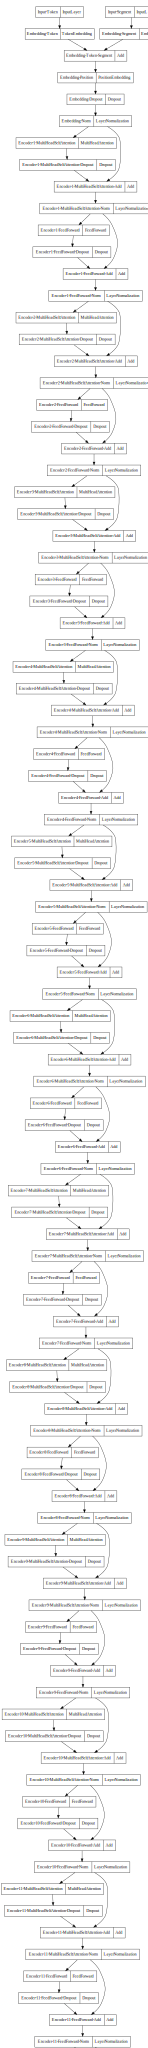

In [38]:

from IPython.display import SVG
from keras.utils import model_to_dot
from keras import backend as K


SVG(model_to_dot(get_bert_finetuning_model(model), dpi=65).create(prog='dot', format='svg'))

In [39]:
sess = K.get_session()
uninitialized_variables = set([i.decode('ascii') for i in sess.run(tf.report_uninitialized_variables())])
init = tf.variables_initializer([v for v in tf.global_variables() if v.name.split(':')[0] in uninitialized_variables])
sess.run(init)

bert_model = get_bert_finetuning_model(model)
bert_model.summary()
history  = bert_model.fit(train_x, train_y, batch_size = 10, validation_split = 0.05, shuffle = False, verbose=1)

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input-Token (InputLayer)       [(None, 384)]        0           []                               
                                                                                                  
 Input-Segment (InputLayer)     [(None, 384)]        0           []                               
                                                                                                  
 Embedding-Token (TokenEmbeddin  [(None, 384, 768),  91812096    ['Input-Token[0][0]']            
 g)                              (119547, 768)]                                                   
                                                                                                  
 Embedding-Segment (Embedding)  (None, 384, 768)     1536        ['Input-Segment[0][0]']    

ResourceExhaustedError: ignored